In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X

array([[-0.62070677,  1.39769519,  0.1034997 , ..., -0.34409714,
         0.62197727, -1.79645246],
       [ 0.90592186,  1.9199751 , -0.7783715 , ..., -1.30560469,
        -1.54476766, -0.24532071],
       [ 0.27902104,  0.85887666,  1.20780417, ...,  2.50374447,
        -0.16497195, -1.95912025],
       ...,
       [ 0.40426899, -0.61988039,  0.87588292, ...,  0.61529851,
         0.97573222,  1.77717222],
       [-0.02512151, -1.05618212, -0.2345739 , ..., -1.6839064 ,
        -0.33327389,  1.13979455],
       [-1.46739126, -0.12314487,  0.66858242, ...,  1.92945851,
        -0.97878106, -2.77522263]])

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
y.shape

(2000,)

In [7]:
# Split the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

### Random Forests

In [10]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

# Predict the probability using xtrain data
ytrain_pred = rf_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

# Predict the probability using xtrain data
ytest_pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9827222222222223


In [11]:
ytrain_pred

array([[0.99, 0.01],
       [0.96, 0.04],
       [0.01, 0.99],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.24, 0.76]])

In [12]:
ytrain_pred.shape

(1400, 2)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lg_classifier = LogisticRegression()

lg_classifier.fit(x_train,y_train)

ytrain_pred = lg_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = lg_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()

ada_classifier.fit(x_train, y_train)

ytrain_pred = ada_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = ada_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNNClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(x_train, y_train)

ytrain_pred = knn_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### Now we will focus on selecting the best threshold for maximum accuracy

In [16]:
pred = []

for model in [rf_model,lg_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))

final_prediction = pd.concat(pred, axis=1).mean(axis=1)

print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9850000000000001


In [17]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.63,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [18]:
final_prediction

0      0.882762
1      0.120823
2      0.821283
3      0.747853
4      0.574947
         ...   
595    0.121340
596    0.120345
597    0.874197
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [19]:
### Calculate the ROC curve

## fpr --> false positive rate
## tpr --> true positive rate

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90728779, 0.90577475, 0.80180204,
       0.80162833, 0.79787052, 0.7955558 , 0.78127646, 0.78071156,
       0.76691919, 0.76537124, 0.71878988, 0.71637362, 0.71201656,
       0.71143711, 0.68038086, 0.67743537, 0.60406376, 0.60175354,
       0.59712652, 0.59236186, 0.58245356, 0.58050386, 0.55792732,
       0.54627948, 0.53855932, 0.53219563, 0.52865858, 0.49616892,
       0.45169266, 0.39155357, 0.38879719, 0.34636723, 0.34336612,
       0.24323004, 0.24140421, 0.23869003, 0.23396893, 0.21289681,
       0.21098417, 0.12034501, 0.1203351 , 0.10548439])

In [20]:
from sklearn.metrics import accuracy_score

accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.451693,0.961667
29,0.496169,0.958333
27,0.532196,0.958333
25,0.546279,0.958333
24,0.557927,0.958333


In [21]:
accuracy_ls

,thresholds,accuracy
30,0.451693,0.961667
29,0.496169,0.958333
27,0.532196,0.958333
25,0.546279,0.958333
24,0.557927,0.958333
28,0.528659,0.956667
26,0.538559,0.956667
31,0.391554,0.950000
32,0.388797,0.948333
23,0.580504,0.948333


In [22]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue',linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

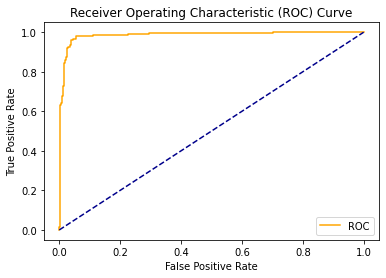

In [23]:
plot_roc_curve(fpr, tpr)

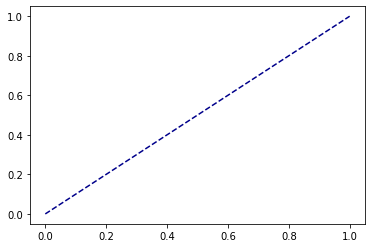

In [24]:
plt.plot([0,1],[0,1], color='darkblue',linestyle='--')